<a href="https://colab.research.google.com/github/EmilianoSantacruz/EmilianoSantacruz/blob/main/labs/03-pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/rhodes-byu/cs-stat-180/blob/main/labs/03-pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

# CS/STAT 180 Lab 3: Intro to Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Introduction:
Welcome to your first pandas lab!

Much of this lab has been adapted from this [link](https://acme.byu.edu/0000017c-ccff-da17-a5fd-cdff03a50000/acmefiles-09-pandas1-2021-pdf) pandas introduction lab from the ACME major. Feel free to read through it and use it as you complete this lab.

### Lab Objective:

The goal of this lab is for you to become more comfortable in Python's pandas library. We'll introduce you to pandas data structures, syntax, and powerful capacity.

### Important Hints
Notice that most of the functions we learn about in this lab return new values. In order to save these values, we must store them.

For example, `df.drop(columns=['column1'])` will drop the column1 from df, but we must call `df = df.drop(columns=['column1'])` to store the changed dataframe. Alternatively, you can set the `inplace` argument to `True` to save changes to the df without explicit reassignment.

#### Series:
The following cell creates a pandas series, which is essentially a list with an index for each entry in the list. The index is generally used as a label for the data. In this example, the name serves as the index.

In [2]:
# Run the below cell to create a new Series:
math = pd.Series([80, 96, 78, 59],['Mark', 'Barbara', 'Eleanor', 'David'])
print(math)

Mark       80
Barbara    96
Eleanor    78
David      59
dtype: int64


Notice that each element in the above series 'math' is a number 1-100, and each of these elements are labeled with a name. The dtype (data type) of this series is an int64. Let's say these numbers represent each student's grade in their math class.

## Exercise 1: Pandas Series

Create a pandas series of type int64 called 'english' storing our four student's english grades:

Mark -> 90

Barbara -> 87

Eleanor -> 97

David -> 65

In [3]:
#Create a pandas series below:
english = pd.Series([90, 87, 97, 65], index=['Mark', 'Barbara', 'Eleanor', 'David'])

**DataFrame**

The next, and most important, data structure in pandas is the DataFrame. A DataFrame is a collection of multiple Series objects, and it is essentially a 2d array/list with each row labeled by an index, and each column labeled as a column.

Below we initialize a DataFrame, 'simple_grades', using the 'math' and 'english' Series that we created above.

In [4]:
simple_grades = pd.DataFrame({"Math": math, "English": english})
print(simple_grades)

         Math  English
Mark       80       90
Barbara    96       87
Eleanor    78       97
David      59       65


Notice that we now have numbers that are labelled twice. Mark's English grade is an 90. Eleanor's Math grade is a 78.

We can also initialize a DataFame using a NumPy array, since pandas is built on top of NumPy. We do that below and call it 'grades'.

In [5]:
data = np.array([[52.0, 73.0], [10.0, 39.0], [35.0, np.nan], [np.nan, 26.0],[np.nan,99.0],[81.0,68.0]])
grades = pd.DataFrame(data, columns = ['Math', 'English'], index = ['Barbara','David','Eleanor','Greg','Lauren','Mark'])


In [6]:
# look at the column labels of grades
print(grades.columns)

# look at the index labels of grades
print(grades.index)

# look at the values (2d array) of grades
print(grades.values)

Index(['Math', 'English'], dtype='object')
Index(['Barbara', 'David', 'Eleanor', 'Greg', 'Lauren', 'Mark'], dtype='object')
[[52. 73.]
 [10. 39.]
 [35. nan]
 [nan 26.]
 [nan 99.]
 [81. 68.]]


## Exercise 2:
To access data in a DataFrame, we use the .loc and the .iloc indexers.

The .loc index selects rows and columns based on their labels. In the below examples, we are looking at the rows of 'David' and 'Greg', while only viewing the 'Math' column. Notice that a list of indices is used to view multiple rows by name.


In [7]:
grades.loc[['David','Greg'],'Math']

,Math
David,10.0
Greg,NaN


The .iloc method selects rows and columns based on their integer position

In [8]:
grades.iloc[[1,3],0]

,Math
David,10.0
Greg,NaN


Use `.loc` to print Eleanor and Mark's grades in both English and Math

In [9]:
grades.loc[['Eleanor', 'Mark'], ['English', 'Math']]

,English,Math
Eleanor,NaN,35.0
Mark,68.0,81.0


You can access an entire column of a DataFrame by using simple square brackets and the name of the column.

In [10]:
grades['Math']

,Math
Barbara,52.0
David,10.0
Eleanor,35.0
Greg,NaN
Lauren,NaN
Mark,81.0


Using the same logic, we can also create a new column using either a numpy array, a list, or a single value.

In [11]:
grades['History'] = np.random.randint(0, 100, 6)
grades['History'] = 100

To view the beginning of a DataFrame, we can use .head(n). This makes it a lot easier to get an idea of what the data look like without printing the entire dataframe (especially when the df is huge!).

In [12]:
grades.head(3)

,Math,English,History
Barbara,52.0,73.0,100
David,10.0,39.0,100
Eleanor,35.0,NaN,100


You can use .reindex to change the order of either the rows or columns, and .sort_values to sort the DataFrame by a specified column value.

In [13]:
grades.reindex(columns = ['English', 'Math', 'History'])
grades.sort_values('Math', ascending = False)

,Math,English,History
Mark,81.0,68.0,100
Barbara,52.0,73.0,100
Eleanor,35.0,NaN,100
David,10.0,39.0,100
Greg,NaN,26.0,100
Lauren,NaN,99.0,100


You can also drop columns from a dataframe by using df.drop(columns=[])

In [14]:
grades.drop(columns = ['Math'])

,English,History
Barbara,73.0,100
David,39.0,100
Eleanor,NaN,100
Greg,26.0,100
Lauren,99.0,100
Mark,68.0,100


## Exercise 3: Girlfriend Vs. Fortnite
The costs.csv downloaded earlier contains an estimate of my costs over the past few semesters.
* Read in the costs.csv file (Hint: try looking at pandas.read_csv())
* Add a column called 'girlfriend' with all values set to 500
* Reindex the columns such that the amount spent on rent is the first column and the other columns stay in the same order
* Sort the DataFrame in descending order based on how much I spent on fortnite_skins
* Reset all the values in the rent column to 1000

In [15]:
#Girl Friend Data
!curl -o costs.csv https://raw.githubusercontent.com/wingated/cs180_labs/main/costs.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   125  100   125    0     0    308      0 --:--:-- --:--:-- --:--:--   308


In [16]:
#Enter the code for the question above here:
costs = pd.read_csv("costs.csv")

costs["girlfriend"] = 500

cols = costs.columns.tolist()
cols.remove("rent")
cols = ["rent"] + cols
costs = costs.reindex(columns=cols)

costs = costs.sort_values("fortnite_skins", ascending=False)

costs["rent"] = 1000

costs


,rent,books,food,fortnite_skins,girlfriend
2,1000,300,775,40,500
3,1000,312,750,18,500
4,1000,330,712,16,500
0,1000,385,800,15,500
1,1000,280,700,10,500
5,1000,120,900,5,500


## Exercise 4: Pandas Methods

Pandas DataFrames provide many useful methods for summarizing and analyzing data:

- `.mean()`: Computes the mean (average) of each column.
- `.max()`: Returns the maximum value in each column.
- `.sum()`: Calculates the sum of each column.
- `.min()`: Returns the minimum value in each column.
- `.count()`: Counts the number of non-null values in each column.
- `.std()`: Computes the standard deviation of each column.

These methods can be used on the entire DataFrame or on specific columns or rows. For example, `df['column'].mean()` computes the mean of a single column, while `df.mean()` computes the mean for all numeric columns. Most of these methods ignore missing values (`NaN`) by default, making them robust for real-world data analysis.


Calculate the mean cost of each column in the costs DataFrame in the cell below.

In [17]:
#Mean cost of each column
costs.mean()

,0
rent,1000.000000
books,287.833333
food,772.833333
fortnite_skins,17.333333
girlfriend,500.000000


## Exercise 5: Supplements

Now we will return to the grades DataFrame that we created earlier.

Dealing with missing data is a difficult topic in data science. The pandas default for missing values is NaN. These can be difficult to deal with because any operation (addition, multiplication, etc) involving an NaN value will always result in an NaN, so finding the mean of a column or adding up all the rows will be meaningless.

What do we do with NaN values? The answer is always: it depends, but we should also ask: why do we have missing values? It could be that some people only filled out half the survey, it could be that the data should read 0.0 but it wasn't filled out. It could mean (in our example) that the student isn't enrolled in that class. It could be many reasons, and we should always figure them out first!

In pandas we can do a couple things with NaN values.

To drop all rows containing NaN values, we can simply call DataFrame.dropna()


Or we could fill the NaN values with a specified value, like 0.0:

In [18]:
grades.fillna(0.0)

,Math,English,History
Barbara,52.0,73.0,100
David,10.0,39.0,100
Eleanor,35.0,0.0,100
Greg,0.0,26.0,100
Lauren,0.0,99.0,100
Mark,81.0,68.0,100


The supplements.csv downloaded below contains vitamin information (in mg) for 20 different supplements I'm considering as I get ready for summer:
* Read in the supplements.csv file
* Fill all the na values using backwards filling, that is, set method='bfill' (HINT: put method='bfill' in the function call! Google it if you're confused)
* Sort the DataFrame by my most important vitamin, vitamin b6, in descending order
* Use .drop() to create a new df, subset_df, containing all the vitamins in the supplements file except vitamin_d
* Create a boxplot of all columns in subset_df (hint - make sure to call plt.show() at the end!!)

In [19]:
!curl -o supplements.csv https://raw.githubusercontent.com/porterjenkins/CS180/main/data/supplements.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   338  100   338    0     0    787      0 --:--:-- --:--:-- --:--:--   787


/tmp/ipython-input-521707878.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  supp = supp.fillna(method="bfill")


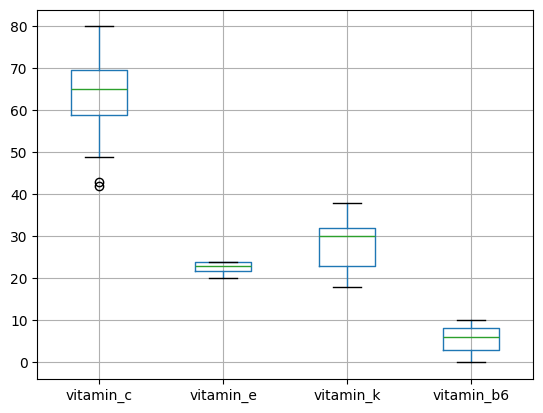

In [20]:
#Enter your code in here for question #5
supp = pd.read_csv("supplements.csv")

supp = supp.fillna(method="bfill")

supp = supp.sort_values("vitamin_b6", ascending=False)

subset_df = supp.drop(columns=["vitamin_d"])

subset_df.boxplot()
plt.show()

## Exercise 6
Write something that you noticed in the supplements data. Feel free to poke around, plot some more things, and find something interesting!

In [21]:
# Exploratory Data Analysis


I noticed that vitamin_b6 has a bigger spread than most other vitamins. Some supplements have very high b6 and others have very low b6.
